# 3.11 模型选择、欠拟合和过拟合
## 3.11.4 多项式函数拟合实验

In [1]:
%matplotlib inline
import torch
import numpy as np
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l

print(torch.__version__)

1.3.0


### 3.11.4.1 生成数据集

In [2]:
# help(torch.cat)

In [3]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = torch.randn((n_train + n_test, 1))
poly_features = torch.cat((features, torch.pow(features, 2), torch.pow(features, 3)), 1) 

print(poly_features.shape)

labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1]
          + true_w[2] * poly_features[:, 2] + true_b)
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

torch.Size([200, 3])


In [4]:
features[:2], poly_features[:2], labels[:2]

(tensor([[-1.9627],
         [-0.7057]]), tensor([[-1.9627,  3.8522, -7.5606],
         [-0.7057,  0.4980, -0.3514]]), tensor([-52.7862,   0.4788]))

### 3.11.4.2 定义、训练和测试模型

In [5]:
# help(d2l.plt.semilogy)

In [6]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

In [7]:
# help(torch.nn.Linear)

In [8]:
# help(torch.utils.data.DataLoader)

In [9]:
# By default, the losses are averaged over each loss element in the batch.
# help(torch.nn.MSELoss())

In [10]:
num_epochs, loss = 100, torch.nn.MSELoss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = torch.nn.Linear(train_features.shape[-1], 1)
    # 通过Linear文档可知，pytorch已经将参数初始化了，所以我们这里就不手动初始化了
    
    batch_size = min(10, train_labels.shape[0])    
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)
    
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
#             print(X)
#             print(y.view(-1, 1))
#             print(y.view(-1, 1).shape)
            l = loss(net(X), y.view(-1, 1))
#             print(net(X).shape)
#             print(l)
#             assert(1==2)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)
        train_ls.append(loss(net(train_features), train_labels).item())
        test_ls.append(loss(net(test_features), test_labels).item())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net.weight.data,
          '\nbias:', net.bias.data)

### 3.11.4.3 三阶多项式函数拟合（正常）

In [11]:
poly_features[:n_train, :].shape

torch.Size([100, 3])

In [12]:
poly_features[n_train:, :].shape

torch.Size([100, 3])

In [13]:
labels[:n_train].shape

torch.Size([100])

In [14]:
labels[n_train:].shape

torch.Size([100])

final epoch: train loss 0.00014308400568552315 test loss 0.00017687061335891485
weight: tensor([[ 1.1882, -3.3959,  5.6053]]) 
bias: tensor([4.9980])


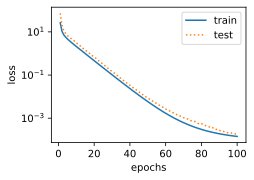

In [15]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :], labels[:n_train], labels[n_train:])

### 3.11.4.4 线性函数拟合（欠拟合）

In [16]:
features[:n_train, :].shape

torch.Size([100, 1])

In [17]:
features[n_train:, :].shape

torch.Size([100, 1])

final epoch: train loss 58.65070724487305 test loss 310.143310546875
weight: tensor([[13.1215]]) 
bias: tensor([0.9048])


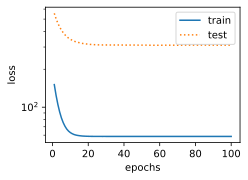

In [18]:
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train], labels[n_train:])

### 3.11.4.5 训练样本不足（过拟合）

In [19]:
poly_features[0:2, :].shape  # 只用两个样本训练

torch.Size([2, 3])

In [20]:
poly_features[n_train:, :].shape

torch.Size([100, 3])

In [21]:
labels[0:2].shape

torch.Size([2])

In [22]:
labels[n_train:].shape

torch.Size([100])

final epoch: train loss 1.395221471786499 test loss 7.686881065368652
weight: tensor([[-0.3557, -2.3048,  6.1261]]) 
bias: tensor([1.8647])


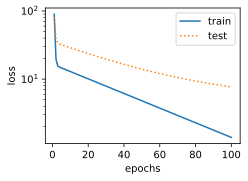

In [23]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2], labels[n_train:])